In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../data/kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
column_mapping = {
    'age': 'age',
    'bp': 'blood pressure',
    'sg': 'specific gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red blood cells',
    'pc': 'pus cell',
    'pcc': 'pus cell clumps',
    'ba': 'bacteria',
    'bgr': 'blood glucose random',
    'bu': 'blood urea',
    'sc': 'serum creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed cell volume',
    'wc': 'white blood cell count',
    'rc': 'red blood cell count',
    'htn': 'hypertension',
    'dm': 'diabetes mellitus',
    'cad': 'coronary artery disease',
    'appet': 'appetite',
    'pe': 'pedal edema',
    'ane': 'anemia',
    'classification': 'class'
}


In [5]:
df.rename(columns=column_mapping, inplace=True)

In [6]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
len(df)

400

In [8]:
df = df.replace({
    "yes": 1, "no": 0,
    "ckd": 1, "notckd": 0,
    "normal": 1, "abnormal": 0,
    "present": 1, "notpresent": 0,
    "good": 1, "poor": 0
})


C:\Users\angel\AppData\Local\Temp\ipykernel_7680\396952375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


### Special cases: Tabs and other anomalities

In [10]:
df = df.replace({'\tyes': 1, '\tno': 0, '?': np.nan})

C:\Users\angel\AppData\Local\Temp\ipykernel_7680\2866192150.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'\tyes': 1, '\tno': 0, '?': np.nan})


In [11]:
df = df.drop(columns=['id'])

In [12]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0,0.0,1.0,0.0,0.0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red blood cells          248 non-null    float64
 6   pus cell                 335 non-null    float64
 7   pus cell clumps          396 non-null    float64
 8   bacteria                 396 non-null    float64
 9   blood glucose random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

We will convert all the columns object type to numeric types

In [15]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().replace('?', np.nan).replace(' ?', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

In [17]:
for col in df.columns[df.isna().any()]:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else -1)

In [18]:
print("Data types for cleaning: ")
print(df.dtypes)

Data types for cleaning: 
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells            float64
pus cell                   float64
pus cell clumps            float64
bacteria                   float64
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
hypertension               float64
diabetes mellitus          float64
coronary artery disease    float64
appetite                   float64
pedal edema                float64
anemia                     float64
class                      float64
dtype: object


In [19]:
df.corr()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
age,1.000000,0.136316,-0.160374,0.085918,0.186750,-0.014904,-0.102286,0.157401,0.042427,0.230731,...,-0.212796,0.093794,-0.203199,0.395073,0.363880,0.231419,-0.156581,0.094772,0.052938,0.227842
blood pressure,0.136316,1.000000,-0.166980,0.123518,0.189561,-0.150384,-0.156231,0.056808,0.110164,0.150180,...,-0.289237,0.022177,-0.219317,0.266901,0.229465,0.084135,-0.175054,0.056902,0.195134,0.293693
specific gravity,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,0.253894,0.365353,-0.306426,-0.231704,-0.299413,...,0.496434,-0.195068,0.432222,-0.323643,-0.353861,-0.135814,0.230975,-0.253803,-0.184155,-0.659504
albumin,0.085918,0.123518,-0.479962,1.000000,0.287751,-0.394844,-0.561713,0.417868,0.377935,0.293150,...,-0.473446,0.202920,-0.405092,0.406057,0.312267,0.200957,-0.303145,0.411080,0.229556,0.531562
sugar,0.186750,0.189561,-0.292053,0.287751,1.000000,-0.092940,-0.190062,0.168091,0.119399,0.627002,...,-0.181285,0.156649,-0.161994,0.254268,0.433281,0.229301,-0.069216,0.116442,0.042464,0.294555
red blood cells,-0.014904,-0.150384,0.253894,-0.394844,-0.092940,1.000000,0.377394,-0.102948,-0.184402,-0.138615,...,0.279875,0.003471,0.196534,-0.140538,-0.147829,-0.111493,0.160868,-0.199285,-0.107625,-0.282642
pus cell,-0.102286,-0.156231,0.365353,-0.561713,-0.190062,0.377394,1.000000,-0.520118,-0.330401,-0.247665,...,0.418435,-0.106733,0.381949,-0.291719,-0.203943,-0.172295,0.274985,-0.350227,-0.260566,-0.375154
pus cell clumps,0.157401,0.056808,-0.306426,0.417868,0.168091,-0.102948,-0.520118,1.000000,0.275082,0.195223,...,-0.296580,0.163215,-0.263810,0.195623,0.167336,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,0.042427,0.110164,-0.231704,0.377935,0.119399,-0.184402,-0.330401,0.275082,1.000000,0.079162,...,-0.189420,0.104748,-0.192212,0.089046,0.081484,0.162395,-0.149126,0.134732,0.052208,0.186871
blood glucose random,0.230731,0.150180,-0.299413,0.293150,0.627002,-0.138615,-0.247665,0.195223,0.079162,1.000000,...,-0.258200,0.119881,-0.214094,0.367816,0.507799,0.207020,-0.177285,0.094806,0.112449,0.379321


<Axes: >

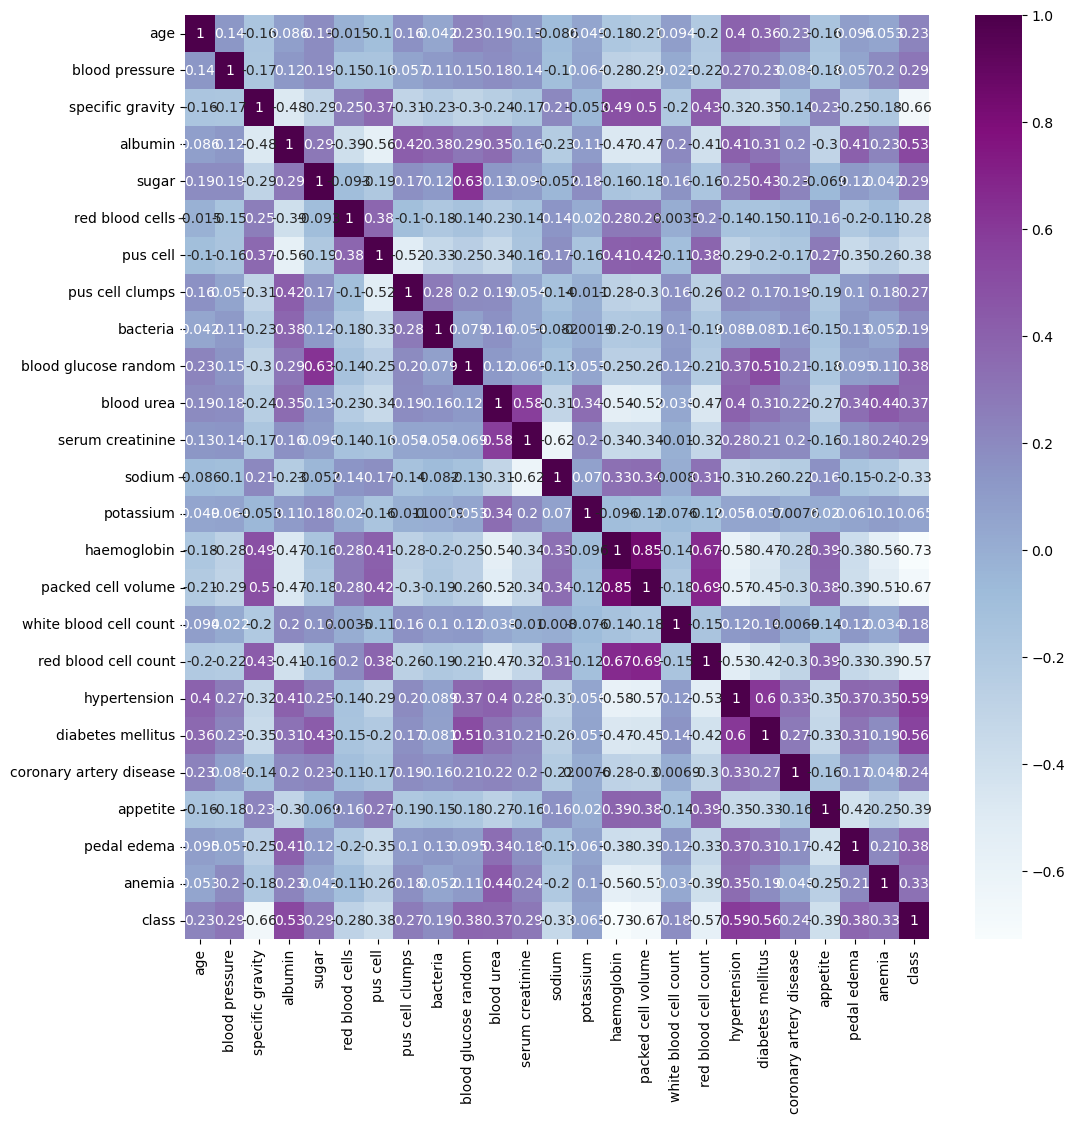

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

In [21]:
df.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [22]:
from sklearn.feature_selection import SelectKBest

In [23]:
from sklearn.feature_selection import chi2

In [24]:
X = df.drop(columns=['class'])
y = df['class']

In [25]:
X.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia'],
      dtype='object')

In [26]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64

In [27]:
important=SelectKBest(score_func=chi2,k=10)

In [28]:
important = important.fit(X,y)

In [29]:
mask = important.get_support()

In [30]:
selected_features = X.columns[mask]

In [31]:
print("Top features:\n", selected_features)

Top features:
 Index(['age', 'albumin', 'sugar', 'blood glucose random', 'blood urea',
       'serum creatinine', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'hypertension'],
      dtype='object')


In [32]:
important

SelectKBest(score_func=<function chi2 at 0x0000022C68740E00>)

In [33]:
X_selected = important.transform(X)

In [34]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

In [35]:
X_selected_df.head()

,age,albumin,sugar,blood glucose random,blood urea,serum creatinine,haemoglobin,packed cell volume,white blood cell count,hypertension
0,48.0,1.0,0.0,121.0,36.0,1.2,15.4,44.0,7800.0,1.0
1,7.0,4.0,0.0,121.0,18.0,0.8,11.3,38.0,6000.0,0.0
2,62.0,2.0,3.0,423.0,53.0,1.8,9.6,31.0,7500.0,0.0
3,48.0,4.0,0.0,117.0,56.0,3.8,11.2,32.0,6700.0,1.0
4,51.0,2.0,0.0,106.0,26.0,1.4,11.6,35.0,7300.0,0.0


In [36]:
y = y.replace({'ckd': 1, 'notckd': 0})  # In case any weren't converted
y = pd.to_numeric(y, errors='coerce').fillna(-1)

In [37]:
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected_df, y, test_size=0.2, random_state=42, stratify=y
    )
except ValueError as e:
    print("Stratification failed, trying without:")
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected_df, y, test_size=0.2, random_state=42
    )

In [38]:
rf_ckd = RandomForestClassifier(random_state = 42)
rf_ckd.fit(X_train, y_train)

y_pred_cks = rf_ckd.predict(X_test)

In [39]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_cks))
print(classification_report(y_test, y_pred_cks))

Random Forest Performance:
Accuracy: 0.95
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        30
         1.0       0.98      0.94      0.96        50

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [40]:
# Check if any features perfectly correlate with the target
correlations = df.corr()['class'].abs().sort_values(ascending=False)
print(correlations.head(10))

class                   1.000000
haemoglobin             0.726368
packed cell volume      0.673129
specific gravity        0.659504
hypertension            0.590438
red blood cell count    0.566163
diabetes mellitus       0.555959
albumin                 0.531562
appetite                0.393341
blood glucose random    0.379321
Name: class, dtype: float64


In [41]:
importances = rf_ckd.feature_importances_
feature_imp = pd.DataFrame({"Feature": X_selected_df.columns, "Importance": importances})
feature_imp = feature_imp.sort_values("Importance", ascending=False)
print(feature_imp.head(10))

                  Feature  Importance
6             haemoglobin    0.348975
7      packed cell volume    0.241003
5        serum creatinine    0.135335
1                 albumin    0.090262
9            hypertension    0.060353
3    blood glucose random    0.043910
4              blood urea    0.031491
8  white blood cell count    0.017634
0                     age    0.016537
2                   sugar    0.014500


In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_ckd, X_selected_df, y, cv=5)  # 5-fold CV
print(f"CV Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

CV Accuracy: 0.97 ± 0.02


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
lr_ckd = LogisticRegression(max_iter=3000, random_state=42)
lr_ckd.fit(X_train, y_train)

# Predict
y_pred_lr = lr_ckd.predict(X_test)

# Evaluate
print("Logistic Regression CKD Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression CKD Performance:
Accuracy: 0.9375
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92        30
         1.0       0.96      0.94      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



C:\Users\angel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
X_selected_df.columns

Index(['age', 'albumin', 'sugar', 'blood glucose random', 'blood urea',
       'serum creatinine', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'hypertension'],
      dtype='object')

In [45]:
joblib.dump(lr_ckd, 'new_ckd_model.pkl')

['new_ckd_model.pkl']

In [46]:
print(y.value_counts())

class
1.0    250
0.0    150
Name: count, dtype: int64


In [47]:
print(np.unique(y_pred_cks, return_counts=True))
print(np.unique(y_pred_lr, return_counts=True))

(array([0., 1.]), array([32, 48], dtype=int64))
(array([0., 1.]), array([31, 49], dtype=int64))


In [48]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_rf = CalibratedClassifierCV(RandomForestClassifier(class_weight='balanced'), cv=5)
calibrated_rf.fit(X_train, y_train)


CalibratedClassifierCV(cv=5,
                       estimator=RandomForestClassifier(class_weight='balanced'))

In [49]:
y_pred_calib = calibrated_rf.predict(X_test)

# Evaluate
print("Logistic Regression CKD Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_calib))
print(classification_report(y_test, y_pred_calib))

Logistic Regression CKD Performance:
Accuracy: 0.9375
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        30
         1.0       0.98      0.92      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [50]:
input_features = {
    'age': 28.0,
    'albumin': 4.6,
    'sugar': 10.9,
    'blood_glucose_random': 20.2,
    'blood_urea': 39.3,
    'serum_creatinine': 1.7,
    'haemoglobin': 11.1,
    'packed_cell_volume': 35.3,
    'white_blood_cell_count': 5.4,
    'hypertension': 0.0
}

# Ensure feature order matches what the model expects
feature_order = [
    'age', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea',
    'serum_creatinine', 'haemoglobin', 'packed_cell_volume',
    'white_blood_cell_count', 'hypertension'
]

# Format as a 2D array for prediction
input_array = np.array([input_features[f] for f in feature_order]).reshape(1, -1)

# Make predictions
predicted_class = calibrated_rf.predict(input_array)[0]
predicted_prob = calibrated_rf.predict_proba(input_array)[0]

print("Predicted Class:", predicted_class)
print("Probabilities:", predicted_prob)

Predicted Class: 1.0
Probabilities: [0.0285007 0.9714993]


C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:4

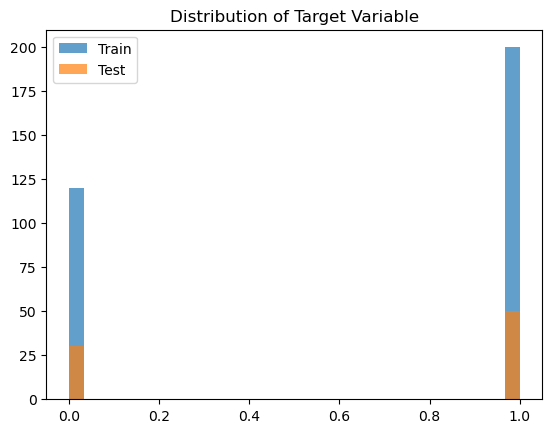

In [51]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins=30, alpha=0.7, label='Train')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.legend()
plt.title("Distribution of Target Variable")
plt.show()

In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Now fit the model again
new_model = RandomForestClassifier(random_state=42)
new_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [53]:
y_new_new = new_model.predict(X_test)

In [54]:
print(classification_report(y_test, y_new_new))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        30
         1.0       0.98      0.96      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



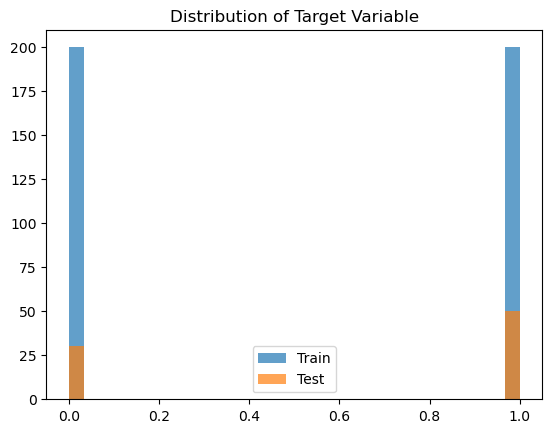

In [55]:
import matplotlib.pyplot as plt
plt.hist(y_resampled, bins=30, alpha=0.7, label='Train')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.legend()
plt.title("Distribution of Target Variable")
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',  # balances both classes
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_resampled, y_resampled)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [112]:
from sklearn.metrics import classification_report

y_prediction = best_model.predict(X_test)
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        30
         1.0       0.98      0.94      0.96        50

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [114]:
joblib.dump(best_model, 'new_ckd_update.pkl')

['new_ckd_update.pkl']

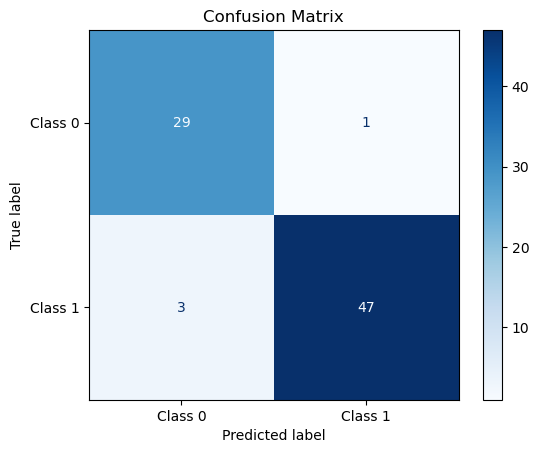

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test = true labels
# y_pred = predicted labels (from your model)

cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
